*****
## Necessary Library Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [38]:
sys.path.append(os.path.abspath("../")) # get the parent directory
import importlib
from src.data_processing import preprocess
importlib.reload(preprocess)
from src.data_processing.preprocess import *


**Fixing the display size**

In [3]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) # no limit on the number of columns
pd.set_option('display.max_rows', None)  # no limit on the number of rows
pd.set_option('display.max_colwidth', None) # no limit on the column width

*****
## Dataset Import

In [4]:
df = load_data("D:/Programing/web-attack-detection/data/raw/cic-ids2017.csv")

*****
## Basic Statistics

In [5]:
df.shape # checking the shape of the data

(1854979, 78)

In [6]:
df.info() # checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854979 entries, 0 to 1854978
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int64  
 1   Flow Duration             int64  
 2   Total Fwd Packets         int64  
 3   Total Backward Packets    int64  
 4   Fwd Packets Length Total  int64  
 5   Bwd Packets Length Total  int64  
 6   Fwd Packet Length Max     int64  
 7   Fwd Packet Length Min     int64  
 8   Fwd Packet Length Mean    float64
 9   Fwd Packet Length Std     float64
 10  Bwd Packet Length Max     int64  
 11  Bwd Packet Length Min     int64  
 12  Bwd Packet Length Mean    float64
 13  Bwd Packet Length Std     float64
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float64
 17  Flow IAT Std              float64
 18  Flow IAT Max              int64  
 19  Flow IAT Min              int64  
 20  Fwd IAT Total           

In [7]:
df.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1854979.0,1.854979e+06,1854979.0,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1854979.0,1854979.0,1854979.0,1854979.0,1854979.0,1854979.0,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06,1.854979e+06
mean,1.037655e+01,1.958606e+07,1.092797e+01,1.239436e+01,6.807790e+02,1.954806e+04,2.590231e+02,2.136047e+01,7.200605e+01,8.745901e+01,1.210900e+03,4.637802e+01,4.177981e+02,4.741838e+02,4.979851e+05,2.010938e+04,1.666773e+06,4.014740e+06,1.276818e+07,1.547434e+05,1.920713e+07,3.369562e+06,4.686743e+06,1.259796e+07,1.131406e+06,1.248857e+07,2.236401e+06,2.036409e+06,6.185375e+06,1.120168e+06,3.782846e-02,0.0,1.239906e-05,0.0,-3.591151e+04,-2.600141e+03,1.588323e+04,4.300001e+03,1.831483e+01,1.318078e+03,2.300968e+02,4.096327e+02,7.199923e+05,3.750662e-02,3.782846e-02,3.310011e-04,2.679680e-01,2.984125e-01,8.801986e-02,1.239906e-05,3.320792e-04,7.158275e-01,2.554808e+02,7.200605e+01,4.177981e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.092797e+01,6.807630e+02,1.239436e+01,1.954754e+04,6.524928e+03,1.964014e+03,6.060725e+00,-3.158118e+03,1.048993e+05,5.042506e+04,1.922260e+05,7.644729e+04,1.169954e+07,7.110462e+05,1.223422e+07,1.114947e+07
std,5.390571e+00,3.756068e+07,7.937963e+02,1.060546e+03,1.188423e+04,2.402223e+06,8.445623e+02,6.817003e+01,2.207266e+02,3.350578e+02,2.291022e+03,7.198719e+01,7.053241e+02,9.980207e+02,8.382511e+06,1.240363e+05,4.741517e+06,9.193066e+06,2.857494e+07,2.905125e+06,3.752969e+07,1.028153e+07,1.146399e+07,2.868754e+07,9.114126e+06,3.179213e+07,9.622248e+06,7.449245e+06,1.984511e+07,8.917879e+06,1.907813e-01,0.0,3.521209e-03,0.0,2.593544e+07,1.762976e+06,1.136537e+05,3.005094e+04,2.667367e+01,2.378500e+03,3.509237e+02,7.431250e+02,1.992293e+06,1.899997e-01,1.907813e-01,1.819043e-02,4.429010e-01,4.575616e-01,2.833239e-01,3.521209e-03,1.822002e-02,7.432272e-01,3.806081e+02,2.207266e+02,7.053241e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.937963e+02,1.186688e+04,1.060546e+03,2.402179e+06,1.347673e+04,8.502986e+03,6.409633e+02,1.3073

In [8]:
# checking for duplicate values
print("Duplicate values in the dataset: ", df.duplicated().sum())

Duplicate values in the dataset:  78845


In [9]:
# checking for missing values
null_counts = df.isnull().sum()
print(f"{null_counts[null_counts > 0]}")

Series([], dtype: int64)


In [10]:
print(df[:10])

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6      112740690                 32                      16   
1         6      112740560                 32                      16   
2         0      113757377                545                       0   
3        17         100126                 22                       0   
4         0          54760                  4                       0   
5         6            617                  7                       4   
6         6              8                  1                       1   
7         6            881                  9                       4   
8         6           1056                  9                       6   
9         6            515                  7                       4   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                      6448                      1152                    403   
1                      6448         

*****
# Class Distribution

In [11]:
# create a new status column that contain 'safe' or 'malicious' based on the label column.
df = create_status(df)

In [12]:
df['status'].value_counts()

status
safe         1518487
malicious     336492
Name: count, dtype: int64

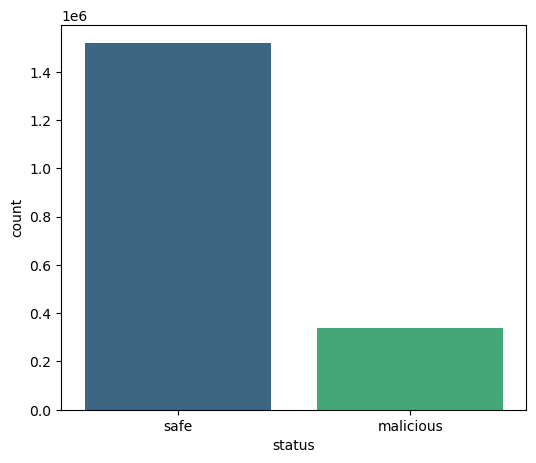

In [13]:
# plot the distribution of status column
count_plot(df=df, feature='status')

In [14]:
label_counts = df['Label'].value_counts().reset_index()
print(label_counts)

                         Label    count
0                       Benign  1518487
1                     DoS Hulk   172846
2                         DDoS   128014
3                DoS GoldenEye    10286
4                  FTP-Patator     5931
5                DoS slowloris     5385
6             DoS Slowhttptest     5228
7                  SSH-Patator     3219
8                     PortScan     1956
9     Web Attack � Brute Force     1470
10                         Bot     1437
11            Web Attack � XSS      652
12                Infiltration       36
13  Web Attack � Sql Injection       21
14                  Heartbleed       11


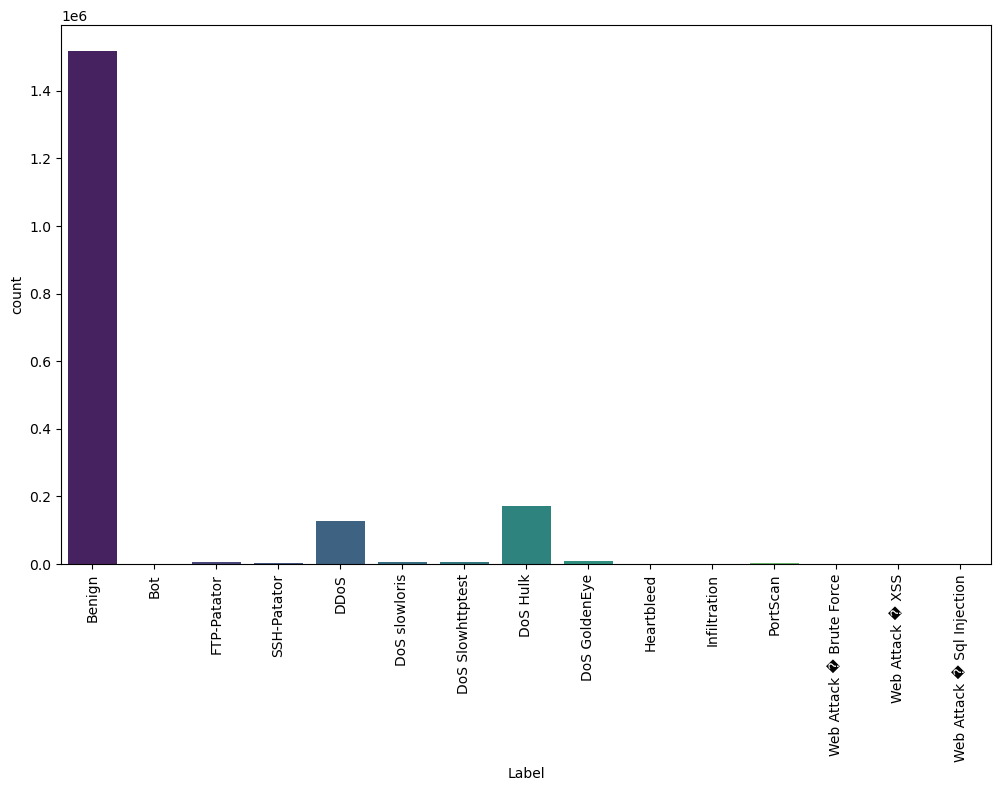

In [19]:
# plot the distribution of the label column
count_plot(df, 'Label', 12, 7, 'vertical')

*****
# Feature Correlation Analysis & Visualizations

In [ ]:
# finding constant features
constant_columns = find_constant_columns(df)
print(constant_columns)

['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [39]:
# finding low variance features
low_variance_columns = find_low_variance_columns(df, 0.01)
print(low_variance_columns)

['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [40]:
# checking initial memory used by the dataframe
initial_memory = df.memory_usage().sum() / 1024**2
print(f"Initial memory usage: {initial_memory} MB")

Initial memory usage: 1118.0370903015137 MB
